# Electronic Product Sales Data Analysis in the US

## Introduction

The main objective here is to extract key performance indicators (KPIs) that will help to make data-driven decisions and improve company business. The data used in this case is Sales Data of Electronic Products in the USA.

## Question to Answer

1.What is the total number of sales?<br>
2.What is the average sales per month?<br>
3.What was the best month for sales? How much was earned that month?<br>
4.What City had the highest number of sales?<br>
5.What product sold the most? Why it sold the most?<br>
6.What products are most often sold together?<br>
7.What time should we display adverstisement to maximize likelihood of customer's buying product?<br>

## Import Libraries

In [89]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

## Merge the 12 months of sales data into a single CSV filem

In [35]:
# Setting the path for joining multiple files
files = os.path.join("C:\\Users\\heman\\OneDrive\\Desktop\\sales data", "Sales*.csv")

# list of merged files returned
files = glob.glob(files)

# Joining files with concat and read_csv
all_months_data = pd.concat(map(pd.read_csv, files), ignore_index=True)

# Export all data to csv    
all_months_data.to_csv("Sales_2019.csv", index=False)

## Read Sales Data

In [36]:
sales_data = pd.read_csv('Sales_2019.csv') # read data
sales_data # show data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [37]:
print('Head')
sales_data.head() # checking the first 5 rows of data

Head


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [38]:
print('Tail')
sales_data.tail() # checking the last 5 rows of data

Tail


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [39]:
sales_data.columns # listing data columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [40]:
# Getting unique values from each category
sales_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']].describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [41]:
# Getting basic information about the data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


We have 186.850 entries, but there are only 186.305 Non-Null entries, so there's some missing value. The data type is also not suitable for some columns.

In [42]:
sales_data[sales_data.isna().any(axis='columns')] #checking NaN values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Getting the number of missing data per column
missing_values_count = sales_data.isnull().sum()
missing_values_count

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## percentage of missing values

In [44]:
percent_missing = (sales_data.isnull().sum() / len(sales_data) * 100).round(2)
df_missing = pd.DataFrame({'% of Missing Values' :percent_missing})
df_missing

,% of Missing Values
Order ID,0.29
Product,0.29
Quantity Ordered,0.29
Price Each,0.29
Order Date,0.29
Purchase Address,0.29


It looks like the missing values are only a tiny piece of our data (0,29 %), so it will not affect much. In this case, let's just drop the missing value.

## cleaning Data

In [45]:
sales_data=sales_data.dropna(how='all') # drop the row when ALL values are NULL

In [46]:
#Checking cleaned data
sales_data[sales_data.isna().any(axis='columns')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [47]:
sales_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

 Now, all the missing data has been removed.

## changing data type

In [48]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [49]:
# We have a problem with the data that has text repetition
sales_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [50]:
# Creating filter to drop text values
filter_text = sales_data['Quantity Ordered'] != 'Quantity Ordered'

# Replacing data without text values in quantity ordered
sales_data = sales_data[filter_text]

In [51]:
sales_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

 Now, the data has no text repetition.

## Changing 'Quantity Ordered' and 'Price Each' Data Type

In [54]:
# Convert the 'Quantity Ordered' and 'Price Each' data type to numeric data type (int and float)
sales_data['Quantity Ordered'], sales_data['Price Each'] = sales_data['Quantity Ordered'].astype('int64'), sales_data['Price Each'].astype('float')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


## Changing 'Order Date' Data Type

In [55]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date']) # change to date-time type data
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


## Adding Month, Hour, Minute, Revenue, and City Column

In [56]:
# Create Year, Month, Hour, Minute Column
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['Minute'] = sales_data['Order Date'].dt.minute

In [57]:
# Create Revenue Column
sales_data['Revenue'] = sales_data['Price Each'] * sales_data['Quantity Ordered']

In [58]:
# Get City name from 'Purchase Address'
city = sales_data['Purchase Address'].str.split(", ",expand=True)[1]
city

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: 1, Length: 185950, dtype: object

In [59]:
# Create City Column
sales_data['City'] = city

In [60]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,20,56,8.97,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,16,0,700.00,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,7,39,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,17,30,379.99,San Francisco


## Cleaned Data Recap

In [61]:
# Check number of unique values for each column
n = sales_data.nunique(axis=0)
  
print("Number of unique values in each column :\n",n)

Number of unique values in each column :
 Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Year                     2
Month                   12
Hour                    24
Minute                  60
Revenue                 54
City                     9
dtype: int64


In [62]:
sales_data.columns # listing cleaned data columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Year', 'Month', 'Hour', 'Minute', 'Revenue',
       'City'],
      dtype='object')

In [63]:
sales_data['Year'].unique()

array([2019, 2020], dtype=int64)

In this dataset we also have some of 2020 data, but in this case I only want to analyze the 2019 data. So, we'll drop the 2020 data.

In [64]:
sales_data = sales_data[sales_data.Year != 2020] # drop rows that contain '2020' in Year column

In [65]:
n = sales_data.nunique(axis=0)
  
print("Number of unique values in each column for 2019 data:\n",n)

Number of unique values in each column for 2019 data:
 Order ID            178406
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142366
Purchase Address    140768
Year                     1
Month                   12
Hour                    24
Minute                  60
Revenue                 54
City                     9
dtype: int64


## Data Analysis

### Q1: What is the total number of sales?

In [66]:
year_sales = sales_data.groupby('Year').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Revenue' : 'sum'})
year_sales

,Quantity Ordered,Price Each,Revenue
Year,,,
2019,209038,184.38772,34483365.68


The total sales in 2019 were USD 34.483.365 with 209.038 products sold

## Basic Analysis

In [69]:
product_sales = sales_data.groupby('Product').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Revenue' : 'sum'})
print('Quantity Ordered, Price Each, and Revenue By Product')
product_sales

Quantity Ordered, Price Each, and Revenue By Product


,Quantity Ordered,Price Each,Revenue
Product,,,
20in Monitor,4126,109.99,453818.74
27in 4K Gaming Monitor,6243,389.99,2434707.57
27in FHD Monitor,7547,149.99,1131974.53
34in Ultrawide Monitor,6199,379.99,2355558.01
AA Batteries (4-pack),27635,3.84,106118.40
AAA Batteries (4-pack),31012,2.99,92725.88
Apple Airpods Headphones,15657,150.00,2348550.00
Bose SoundSport Headphones,13454,99.99,1345265.46
Flatscreen TV,4818,300.00,1445400.00


In [70]:
# Statistical measure of sales data (numeric)
sales_data_numeric = sales_data.describe(include=[np.number]) 
print("Statistical Measure of Numeric Type Sales Data")
sales_data_numeric

Statistical Measure of Numeric Type Sales Data


,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Revenue
count,185916.000000,185916.000000,185916.0,185916.000000,185916.000000,185916.000000,185916.000000
mean,1.124368,184.387720,2019.0,7.060248,14.415661,29.481744,185.478203
std,0.442749,332.722426,0.0,3.502358,5.421069,17.317339,332.911130
min,1.000000,2.990000,2019.0,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.0,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.0,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.0,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2019.0,12.000000,23.000000,59.000000,3400.000000


In [72]:
# statistical measure of sales data (object / string)
sales_data_object = sales_data.describe(exclude=[np.number],datetime_is_numeric=True)
print("Statistical Measure of Object / String Type Sales Data")
sales_data_object

Statistical Measure of Object / String Type Sales Data


,Order ID,Product,Order Date,Purchase Address,City
count,185916,185916,185916,185916,185916
unique,178406,19,NaN,140768,9
top,160873,USB-C Charging Cable,NaN,"193 Forest St, San Francisco, CA 94016",San Francisco
freq,5,21899,NaN,9,44720
mean,NaN,NaN,2019-07-18 21:10:53.291163904,NaN,NaN
min,NaN,NaN,2019-01-01 03:07:00,NaN,NaN
25%,NaN,NaN,2019-04-16 20:52:00,NaN,NaN
50%,NaN,NaN,2019-07-17 20:09:30,NaN,NaN
75%,NaN,NaN,2019-10-26 06:58:00,NaN,NaN
max,NaN,NaN,2019-12-31 23:53:00,NaN,NaN


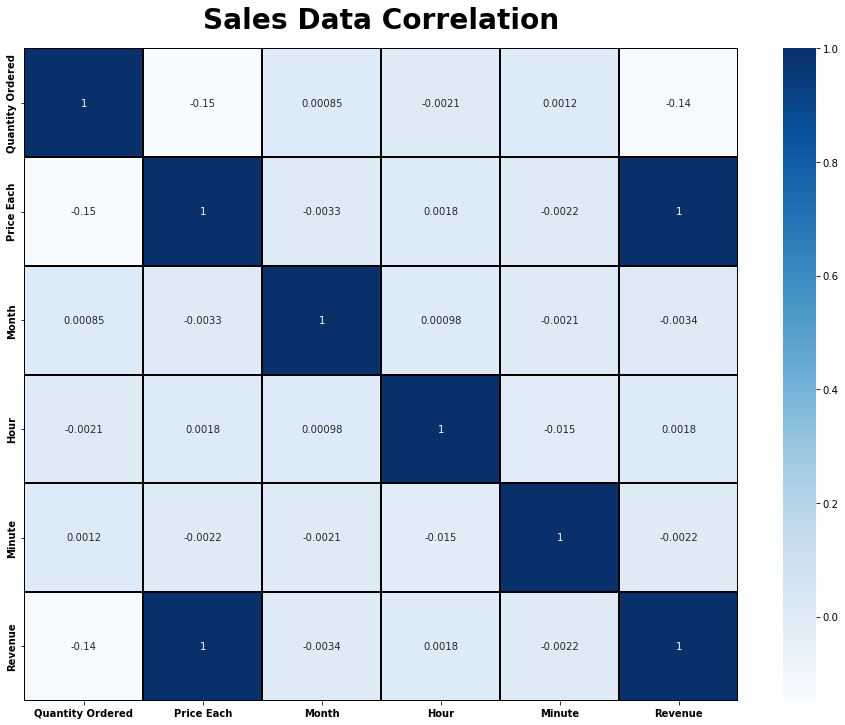

In [73]:
plt.figure(figsize=(16, 12))
sns.heatmap(sales_data[['Quantity Ordered', 'Price Each', 'Month', 'Hour', 'Minute', 'Revenue']].corr(), 
            annot=True, cmap='Blues',linewidths=0.005, linecolor='Black')

plt.title("Sales Data Correlation", weight="bold", fontsize=28, pad=20) # title
plt.xticks(weight="bold", fontsize=10) # x-ticks
plt.yticks(weight="bold", fontsize=10); # y-ticks

### Q2: What is the average sales per month?

In [74]:
avg_month_sales = sales_data.groupby('Month').agg({'Revenue' : 'mean'})
print('Average Sales by Month')
avg_month_sales

Average Sales by Month


,Revenue
Month,
1,187.450795
2,183.884962
3,185.250471
4,185.495390
5,190.305852
6,190.187565
7,185.249826
8,187.648849
9,180.497387


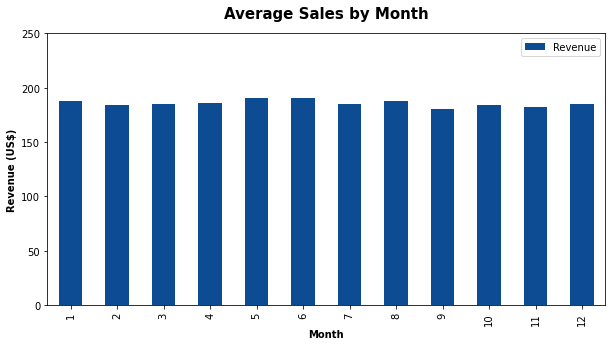

In [75]:
plt.rcParams['figure.figsize']=(10,5)
avg_month_sales.plot(kind='bar', color='#0D4C92')
plt.title('Average Sales by Month', weight='bold', fontsize=15, pad=15)
plt.ylim(0, 250)
plt.ylabel('Revenue (US$)', weight='bold')
plt.xlabel('Month', weight='bold');

In 2019, May has the highest average revenue with USD 190.305852, while September has the lowest average revenue with USD 180.497387.

### Q3: What was the best month for sales? How much was earned that month?

In [76]:
total_month_sales = sales_data.groupby('Month',as_index=False).agg({'Quantity Ordered':'sum', 'Revenue':'sum'})
print('Total Sales by Month')
total_month_sales

Total Sales by Month


,Month,Quantity Ordered,Revenue
0,1,10862,1813586.44
1,2,13449,2202022.42
2,3,17005,2807100.38
3,4,20558,3390670.24
4,5,18667,3152606.75
5,6,15253,2577802.26
6,7,16072,2647775.76
7,8,13448,2244467.88
8,9,13109,2097560.13
9,10,22703,3736726.88


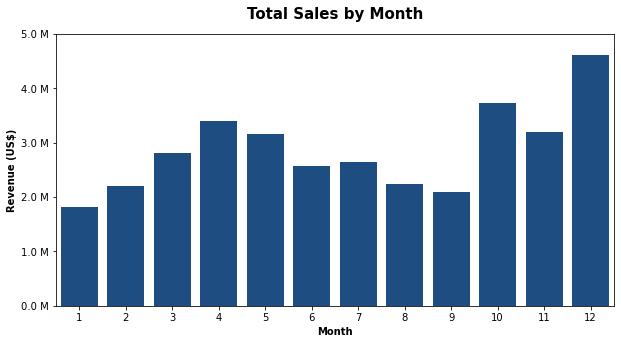

In [77]:
plt.rcParams['figure.figsize']=(10,5)
ay = sns.barplot(x='Month',y='Revenue', data=total_month_sales, color='#0D4C92')
plt.title('Total Sales by Month', weight='bold', fontsize=15, pad=15)
plt.ylabel('Revenue (US$)', weight='bold')
plt.xlabel('Month', weight='bold')

ylabels = ['{:,.1f}'.format(y) + ' M' for y in ay.get_yticks()/1000000]
ay.set_yticks(ay.get_yticks())  # just get and reset whatever you already have
ay.set_yticklabels(ylabels);  # set the new/modified labels

From the graph above we can tell that December is the best month for sales with USD 4.613.443 total revenue. The reason behind this may be because there's Christmas and the holiday in December where it's the momentum to buy a new product as a gift or for themself.

### Q4: What City had the highest number of sales?

In [79]:
    city_sales = sales_data.groupby('City',as_index=False).agg({'Quantity Ordered':'sum', 'Revenue':'sum'})
print('Total Sales by City')
city_sales

Total Sales by City


,City,Quantity Ordered,Revenue
0,Atlanta,16602,2795498.58
1,Austin,11151,1819081.77
2,Boston,22524,3660315.12
3,Dallas,16728,2766260.45
4,Los Angeles,33288,5451570.81
5,New York City,27916,4662976.81
6,Portland,14051,2320337.62
7,San Francisco,50226,8259719.03
8,Seattle,16552,2747605.49


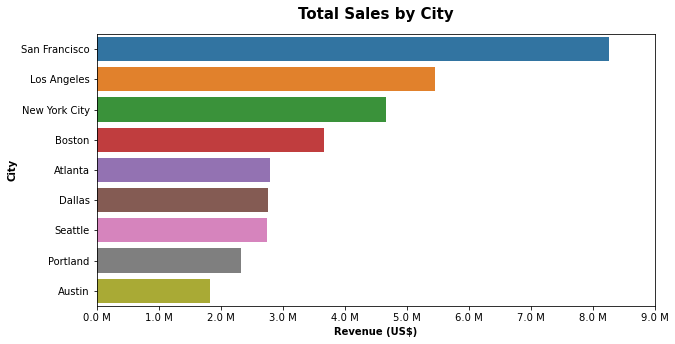

In [80]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.barplot(x='Revenue',y='City', data=city_sales.sort_values('Revenue', ascending=False))
plt.title('Total Sales by City', weight='bold', fontsize=15, pad=15)
plt.ylabel('City', weight='bold')
plt.xlabel('Revenue (US$)', weight='bold')

xlabels = ['{:,.1f}'.format(y) + ' M' for y in ax.get_xticks()/1000000]
ax.set_xticks(ax.get_xticks())  # just get and reset whatever you already have
ax.set_xticklabels(xlabels);  # set the new/modified labels

San Francisco had the highest total sales in 2019 with USD 8.259.719. We need further information and study about the demographic, economic, and advertising to figure out why San Fransisco had the highest sales compared to other cities in the USA.

### Q5: What product sold the most? Why it sold the most?

In [81]:
product_sales = sales_data.groupby('Product',as_index=False).agg({'Quantity Ordered':'sum'}).sort_values('Quantity Ordered', ascending=False)
product_sales

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31012
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23971
12,Lightning Charging Cable,23211
17,Wired Headphones,20553
6,Apple Airpods Headphones,15657
7,Bose SoundSport Headphones,13454
2,27in FHD Monitor,7547
18,iPhone,6847
1,27in 4K Gaming Monitor,6243


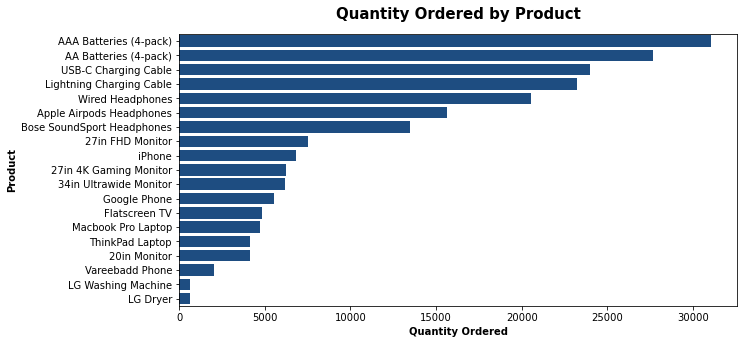

In [82]:
plt.rcParams['figure.figsize']=(10,5)
q5 = sns.barplot(x='Quantity Ordered',y='Product', data=product_sales.sort_values('Quantity Ordered', ascending=False), 
                 color='#0D4C92')
plt.title('Quantity Ordered by Product', weight='bold', fontsize=15, pad=15)
plt.xlabel('Quantity Ordered', weight='bold')
plt.ylabel('Product', weight='bold');

From the graph above we can tell that the most sold products in 2019 were AAA Batteries (4-pack) with 31.012 products ordered. We also can tell that AA Batteries (4-pack), USB-C Charging Cable, Lightning Charging Cable, and Wired Headphones sold more than other products. Why do these products sell more than others? My first impression is that their price is lower than other products. So, let's do further analysis to check our hypothesis by overlaying the graph with product price.

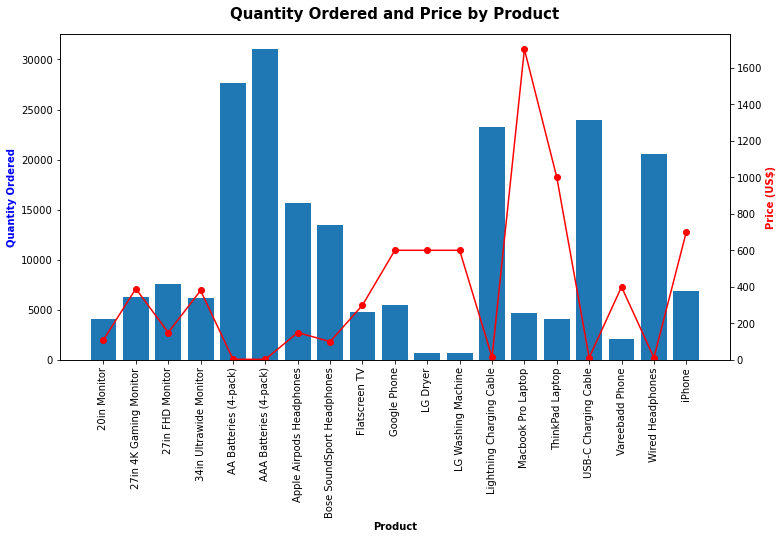

In [83]:
# lets prepare the varables for the plotting
# group the product
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum(['Quantity Ordered'])['Quantity Ordered']
prices = sales_data.groupby('Product').mean(['Price Each'])['Price Each']
products = [product for product, df in product_group]
"""Visualization"""
# let's make a subplots
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_title( # title
    "Quantity Ordered and Price by Product",
    weight="bold", # weight
    fontsize=15, # font-size
    pad=15 # padding
)
ax1.set_xlabel( # x-label
    "Product",
    weight="bold", # weight
    color="black" # color
)
ax1.set_ylabel( # y-label
    "Quantity Ordered", 
    color="blue", # color
    weight="bold" # weight
)
ax1.tick_params(axis='x', labelrotation = 90)

# AXES 2
ax2.plot( # plot
    products, # x-axis
    prices, # y-axis
    color="red",
    marker='o'
)
ax2.set_ylabel( # y-label
    "Price (US$)", 
    color="red", # color
    weight="bold" # weight
)
ax2.set_ylim(0);

We can say that our hypothesis is true, high-sold products have a low price. The high-sold products also had a lot of demand in the market that was used eventually in daily activity

### Q6: What products are most often sold together?

In [84]:
# Importing libraries to count combination products
from itertools import combinations
from collections import Counter

# Dropping duplicate values of 'Order ID' using duplicated() function
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
# Joining product ordered with the same 'Order ID' in the new column called 'Bundle'
data['Bundle'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

pd.set_option('mode.chained_assignment', None)
# This will stop showing the warning 

data.head()

C:\Users\heman\AppData\Local\Temp/ipykernel_7376/422669635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bundle'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Revenue,City,Bundle
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019,4,19,42,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019,4,19,42,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",2019,4,11,31,99.99,Boston,"Bose SoundSport Headphones,Bose SoundSport Hea..."


We've got some data with the same Order ID and Bundle because we did merge them in every situation in groupby without dropping the duplicate values. So, we have to drop the rows with duplicate Order ID and Bundle values.

In [85]:
# Dropping duplicate values
data = data[['Order ID', 'Bundle']].drop_duplicates()
# Creating a new variable for Counter
count = Counter()
# Creating a loop to count all the 2 product bundles.
for row in data['Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# Creating another loop to display the 10 most often products that sold together.
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


We can see the most often products that sold together are iPhone and Lightning Charging Cable with 1004 transactions. Google Phone and USB-C Charging Cable came second with 987 transactions.

With this information we could offer a smart deal bundle to the customer that buys iPhone, we could recommend the Lightning Charging Cable with a discount. We also can bundle the remaining products with good marketing strategies.

### Q7: What time should we display adverstisement to maximize likelihood of customer's buying product?

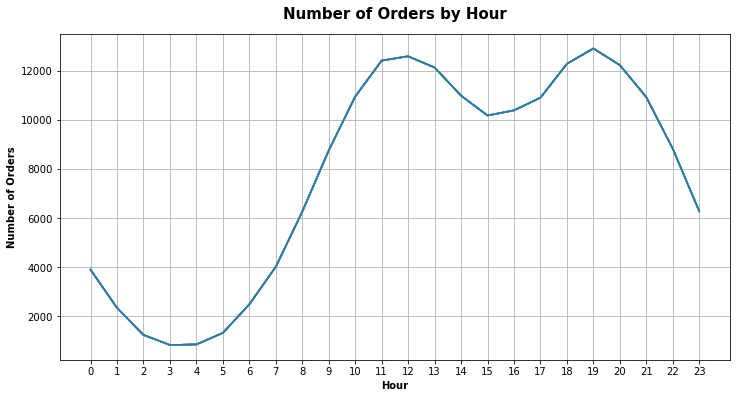

In [86]:
hours_data = sales_data.groupby(['Hour']).count()
hours = [hour for hour, df in sales_data.groupby('Hour')]

# Plotting
plt.figure(figsize=(12, 6))
# makes bar plot 
plt.plot(
    hours, # x-axis
    sales_data.groupby(['Hour']).count()
)
# let's add grid
plt.grid(True)
plt.title( # title
    "Number of Orders by Hour", 
     weight="bold", # weight
    fontsize=15, # font-size
    pad=15
)
plt.xlabel( # x-label
    "Hour", 
    weight="bold", # weight
    loc="center" # location
)
plt.xticks( # x-ticks
    ticks=hours, # labels
)
plt.ylabel( # y-label
    "Number of Orders", 
    weight="bold", # weight
    loc="center" # location
);

We can see that there are 2 peak hours in the data. They are 12 (12 PM) and 19 (7 PM). This makes sense since most people got some spare time for shopping during these hours. With this information, I recommend advertising the product at 9—11 AM and 4—6 PM. For further marketing strategy, we could specify the city and plan the best advertisement that suits the city.

## Conclusion

1. The total sales in 2019 were USD 34.483.365 with 209.038 products sold.<br>
2. May has the highest average revenue with USD 190.305852, while September has the lowest average revenue with USD 180.497387.<br>
3. December is the best month for sales with USD 4.613.443 total revenue.<br>
4. San Francisco had the highest total sales in 2019 with USD 8.259.719 total revenue.<br>
5. AAA Batteries (4-pack) are the most sold product with 31.012 products ordered.<br>
6. iPhone and Lightning Charging Cable are the most often products sold together with 1004 transactions, Google Phone and USB-C Charging Cable came second with 987 transactions.<br>
7. I recommend advertising the product before 12 PM and 7 PM, which could be at 9—11 AM and 4—6 PM.<br>